# 🏎 F1 - PREDICTING AVG Lap Time's 🏎 NEURAL NETWORK MODEL

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score



In [25]:
# Reading in the preprocessed dataframe from GCS bucket
file_path = "https://storage.googleapis.com/f1_winners_historical/q_ml.csv"
q_ = pd.read_csv(file_path,
                 sep=",", low_memory=False)

In [26]:
# Taking a look at the data and setting option to view all columns in df
pd.set_option('display.max_columns', None)

q_

,Unnamed: 0,Race_Winner,Race_AVG_Lap_Time_sec,DriverNumber,Q_LapTime(s),LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,TrackStatus,Year,Event_id,Team_Alfa Romeo,Team_Alfa Romeo Racing,Team_AlphaTauri,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Force India,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_Racing Point,Team_Red Bull Racing,Team_Renault,Team_Sauber,Team_Toro Rosso,Team_Williams,Compound_HARD,Compound_HYPERSOFT,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_SUPERSOFT,Compound_ULTRASOFT,Compound_UNKNOWN,Compound_WET,Driver_ALB,Driver_ALO,Driver_BOT,Driver_DEV,Driver_ERI,Driver_FIT,Driver_GAS,Driver_GIO,Driver_GRO,Driver_HAM,Driver_HAR,Driver_HUL,Driver_KUB,Driver_KVY,Driver_LAT,Driver_LAW,Driver_LEC,Driver_MAG,Driver_MAZ,Driver_MSC,Driver_NOR,Driver_OCO,Driver_PER,Driver_PIA,Driver_RAI,Driver_RIC,Driver_RUS,Driver_SAI,Driver_SAR,Driver_SIR,Driver_STR,Driver_TSU,Driver_VAN,Driver_VER,Driver_VET,Driver_ZHO,IsPersonalBest_True,Q_FreshTyre_True,Q_Hours,Q_Minutes,Q_AirTemp,Q_Humidity,Q_Pressure,Q_TrackTemp,Q_WindDirection,Q_WindSpeed,Q_Rainfall_True,Q1,Q2,Q3,#QLaps,Q_Pos_1,Q_Pos_10,Q_Pos_11,Q_Pos_12,Q_Pos_13,Q_Pos_14,Q_Pos_15,Q_Pos_16,Q_Pos_17,Q_Pos_18,Q_Pos_19,Q_Pos_2,Q_Pos_20,Q_Pos_3,Q_Pos_4,Q_Pos_5,Q_Pos_6,Q_Pos_7,Q_Pos_8,Q_Pos_9,Q_Pos_NC,Q_Pos_RT,Grand Prix_70th-anniversary,Grand Prix_abu-dhabi,Grand Prix_australia,Grand Prix_austria,Grand Prix_azerbaijan,Grand Prix_bahrain,Grand Prix_belgium,Grand Prix_brazil,Grand Prix_canada,Grand Prix_china,Grand Prix_eifel,Grand Prix_emilia-romagna,Grand Prix_france,Grand Prix_germany,Grand Prix_great-britain,Grand Prix_hungary,Grand Prix_italy,Grand Prix_japan,Grand Prix_las-vegas,Grand Prix_mexico,Grand Prix_miami,Grand Prix_monaco,Grand Prix_netherlands,Grand Prix_portugal,Grand Prix_qatar,Grand Prix_russia,Grand Prix_sakhir,Grand Prix_saudi-arabia,Grand Prix_singapore,Grand Prix_spain,Grand Prix_styria,Grand Prix_turkey,Grand Prix_tuscany,Grand Prix_united-states
0,0,SebastianVettel,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,SebastianVettel,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,SebastianVettel,92.637931,27,85.348,2.0,1.0,NaN,NaN,28.492,23.123,33.733,276.0,286.0,296.0,302.0,1.0,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,7,24.7,59.5,1007.9,31.8,318,0.9,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [54]:
#dict(q_.dtypes)

In [27]:
# Had dropped the 'Driver' column previously but wanted to map it to 'Race_Winner' column.
# Creating one column out of the one hot encoded column with drivers

one_hot_columns = ['Driver_ALB','Driver_ALO','Driver_BOT','Driver_DEV','Driver_ERI','Driver_FIT','Driver_GAS','Driver_GIO','Driver_GRO','Driver_HAM','Driver_HAR','Driver_HUL','Driver_KUB','Driver_KVY','Driver_LAT','Driver_LAW','Driver_LEC','Driver_MAG','Driver_MAZ','Driver_MSC','Driver_NOR','Driver_OCO','Driver_PER','Driver_PIA','Driver_RAI','Driver_RIC','Driver_RUS','Driver_SAI','Driver_SAR','Driver_SIR','Driver_STR','Driver_TSU','Driver_VAN','Driver_VER','Driver_VET','Driver_ZHO']

# Function to combine one-hot encoded columns
def combine_one_hot_columns(row):
    for col in one_hot_columns:
        if row[col] == 1:
            return col.split('_')[1]  # Extract driver name from column name
    return 'Unknown'

# Create the new column (keep the original columns)
q_['Driver'] = q_.apply(combine_one_hot_columns, axis=1)

q_




,Unnamed: 0,Race_Winner,Race_AVG_Lap_Time_sec,DriverNumber,Q_LapTime(s),LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,TrackStatus,Year,Event_id,Team_Alfa Romeo,Team_Alfa Romeo Racing,Team_AlphaTauri,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Force India,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_Racing Point,Team_Red Bull Racing,Team_Renault,Team_Sauber,Team_Toro Rosso,Team_Williams,Compound_HARD,Compound_HYPERSOFT,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_SUPERSOFT,Compound_ULTRASOFT,Compound_UNKNOWN,Compound_WET,Driver_ALB,Driver_ALO,Driver_BOT,Driver_DEV,Driver_ERI,Driver_FIT,Driver_GAS,Driver_GIO,Driver_GRO,Driver_HAM,Driver_HAR,Driver_HUL,Driver_KUB,Driver_KVY,Driver_LAT,Driver_LAW,Driver_LEC,Driver_MAG,Driver_MAZ,Driver_MSC,Driver_NOR,Driver_OCO,Driver_PER,Driver_PIA,Driver_RAI,Driver_RIC,Driver_RUS,Driver_SAI,Driver_SAR,Driver_SIR,Driver_STR,Driver_TSU,Driver_VAN,Driver_VER,Driver_VET,Driver_ZHO,IsPersonalBest_True,Q_FreshTyre_True,Q_Hours,Q_Minutes,Q_AirTemp,Q_Humidity,Q_Pressure,Q_TrackTemp,Q_WindDirection,Q_WindSpeed,Q_Rainfall_True,Q1,Q2,Q3,#QLaps,Q_Pos_1,Q_Pos_10,Q_Pos_11,Q_Pos_12,Q_Pos_13,Q_Pos_14,Q_Pos_15,Q_Pos_16,Q_Pos_17,Q_Pos_18,Q_Pos_19,Q_Pos_2,Q_Pos_20,Q_Pos_3,Q_Pos_4,Q_Pos_5,Q_Pos_6,Q_Pos_7,Q_Pos_8,Q_Pos_9,Q_Pos_NC,Q_Pos_RT,Grand Prix_70th-anniversary,Grand Prix_abu-dhabi,Grand Prix_australia,Grand Prix_austria,Grand Prix_azerbaijan,Grand Prix_bahrain,Grand Prix_belgium,Grand Prix_brazil,Grand Prix_canada,Grand Prix_china,Grand Prix_eifel,Grand Prix_emilia-romagna,Grand Prix_france,Grand Prix_germany,Grand Prix_great-britain,Grand Prix_hungary,Grand Prix_italy,Grand Prix_japan,Grand Prix_las-vegas,Grand Prix_mexico,Grand Prix_miami,Grand Prix_monaco,Grand Prix_netherlands,Grand Prix_portugal,Grand Prix_qatar,Grand Prix_russia,Grand Prix_sakhir,Grand Prix_saudi-arabia,Grand Prix_singapore,Grand Prix_spain,Grand Prix_styria,Grand Prix_turkey,Grand Prix_tuscany,Grand Prix_united-states,Driver
0,0,SebastianVettel,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUL
1,1,SebastianVettel,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUL
2,2,SebastianVettel,92.637931,27,85.348,2.0,1.0,NaN,NaN,28.492,23.123,33.733,276.0,286.0,296.0,302.0,1.0,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,7,24.7,59.5,1007.9,31.8,318,0.9,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [28]:
#
Race_w=q_.Race_Winner.unique()
Race_w



array(['SebastianVettel', 'DanielRicciardo', 'LewisHamilton',
       'MaxVerstappen', 'KimiRäikkönen', 'ValtteriBottas',
       'CharlesLeclerc', 'PierreGasly', 'SergioPerez', 'EstebanOcon',
       'CarlosSainz', 'GeorgeRussell'], dtype=object)

In [29]:
q_drv=q_.Driver.unique()
q_drv

array(['HUL', 'LEC', 'ERI', 'GRO', 'SAI', 'MAG', 'PER', 'HAR', 'OCO',
       'RAI', 'VET', 'HAM', 'BOT', 'STR', 'VAN', 'GAS', 'SIR', 'ALO',
       'RIC', 'VER', 'NOR', 'KUB', 'RUS', 'GIO', 'KVY', 'ALB', 'LAT',
       'FIT', 'MAZ', 'MSC', 'TSU', 'ZHO', 'DEV', 'PIA', 'SAR', 'LAW'],
      dtype=object)

In [30]:
# Create a dictionary for individual mappings
driver_mapping = {
    'SebastianVettel': 'VET',
    'DanielRicciardo': 'RIC',
    'LewisHamilton': 'HAM',
    'MaxVerstappen': 'VER',
    'KimiRäikkönen': 'RAI',
    'ValtteriBottas': 'BOT',
    'CharlesLeclerc': 'LEC',
    'PierreGasly': 'GAS',
    'SergioPerez': 'PER',
    'EstebanOcon': 'OCO',
    'CarlosSainz': 'SAI',
    'GeorgeRussell': 'RUS'
}

# Function to apply the mapping to each driver name in the DataFrame
def map_driver(driver_name):
    return driver_mapping.get(driver_name, driver_name)

# Apply the mapping to the 'Driver' column
q_['Race_Winner'] = q_['Race_Winner'].apply(map_driver)



In [31]:
#q_.drop(columns=['W_Driver'], inplace=True)

q_

,Unnamed: 0,Race_Winner,Race_AVG_Lap_Time_sec,DriverNumber,Q_LapTime(s),LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,TrackStatus,Year,Event_id,Team_Alfa Romeo,Team_Alfa Romeo Racing,Team_AlphaTauri,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Force India,Team_Haas F1 Team,Team_McLaren,Team_Mercedes,Team_Racing Point,Team_Red Bull Racing,Team_Renault,Team_Sauber,Team_Toro Rosso,Team_Williams,Compound_HARD,Compound_HYPERSOFT,Compound_INTERMEDIATE,Compound_MEDIUM,Compound_SOFT,Compound_SUPERSOFT,Compound_ULTRASOFT,Compound_UNKNOWN,Compound_WET,Driver_ALB,Driver_ALO,Driver_BOT,Driver_DEV,Driver_ERI,Driver_FIT,Driver_GAS,Driver_GIO,Driver_GRO,Driver_HAM,Driver_HAR,Driver_HUL,Driver_KUB,Driver_KVY,Driver_LAT,Driver_LAW,Driver_LEC,Driver_MAG,Driver_MAZ,Driver_MSC,Driver_NOR,Driver_OCO,Driver_PER,Driver_PIA,Driver_RAI,Driver_RIC,Driver_RUS,Driver_SAI,Driver_SAR,Driver_SIR,Driver_STR,Driver_TSU,Driver_VAN,Driver_VER,Driver_VET,Driver_ZHO,IsPersonalBest_True,Q_FreshTyre_True,Q_Hours,Q_Minutes,Q_AirTemp,Q_Humidity,Q_Pressure,Q_TrackTemp,Q_WindDirection,Q_WindSpeed,Q_Rainfall_True,Q1,Q2,Q3,#QLaps,Q_Pos_1,Q_Pos_10,Q_Pos_11,Q_Pos_12,Q_Pos_13,Q_Pos_14,Q_Pos_15,Q_Pos_16,Q_Pos_17,Q_Pos_18,Q_Pos_19,Q_Pos_2,Q_Pos_20,Q_Pos_3,Q_Pos_4,Q_Pos_5,Q_Pos_6,Q_Pos_7,Q_Pos_8,Q_Pos_9,Q_Pos_NC,Q_Pos_RT,Grand Prix_70th-anniversary,Grand Prix_abu-dhabi,Grand Prix_australia,Grand Prix_austria,Grand Prix_azerbaijan,Grand Prix_bahrain,Grand Prix_belgium,Grand Prix_brazil,Grand Prix_canada,Grand Prix_china,Grand Prix_eifel,Grand Prix_emilia-romagna,Grand Prix_france,Grand Prix_germany,Grand Prix_great-britain,Grand Prix_hungary,Grand Prix_italy,Grand Prix_japan,Grand Prix_las-vegas,Grand Prix_mexico,Grand Prix_miami,Grand Prix_monaco,Grand Prix_netherlands,Grand Prix_portugal,Grand Prix_qatar,Grand Prix_russia,Grand Prix_sakhir,Grand Prix_saudi-arabia,Grand Prix_singapore,Grand Prix_spain,Grand Prix_styria,Grand Prix_turkey,Grand Prix_tuscany,Grand Prix_united-states,Driver
0,0,VET,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUL
1,1,VET,92.637931,27,112.720,1.0,NaN,262.434,NaN,42.085,28.028,42.607,226.0,262.0,293.0,194.0,NaN,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6,24.6,59.1,1007.9,31.7,0,1.3,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUL
2,2,VET,92.637931,27,85.348,2.0,1.0,NaN,NaN,28.492,23.123,33.733,276.0,286.0,296.0,302.0,1.0,1.0,2018,979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,7,24.7,59.5,1007.9,31.8,318,0.9,0.0,83.782,83.544,83.532,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HUL
3,3,VET,

In [32]:
# Preliminary preprocessing
q_.drop(columns=['Unnamed: 0'], inplace=True)


# Identifying numerical and categorical features for preprocessing
numerical_cols = q_.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = q_.select_dtypes(include=['object']).columns.tolist()

In [33]:


# Removing 'Race_AVG_Lap_Time_sec' column from features
numerical_cols.remove('Race_AVG_Lap_Time_sec')

# Preprocessing for numerical data: imputating + scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: imputating + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)



In [34]:
# Separating target variable and features
X = q_.drop('Race_AVG_Lap_Time_sec', axis=1)
y = q_['Race_AVG_Lap_Time_sec']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Preprocessing the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [35]:
# Defining the model architecture
model = Sequential([
    Dense(93, input_shape=(X_train_preprocessed.shape[1],), activation='relu'),
    Dropout(0.25),
    Dense(36, activation='relu'),
    Dropout(0.25),
    Dense(63, activation='relu'),
    Dropout(0.25),
    Dense(96, activation='relu'),
    Dropout(0.25),
    Dense(93, activation='relu'),
    Dropout(0.25),
    Dense(96, activation='relu'),
    Dropout(0.25),

    Dense(1, activation='linear')  # Change to linear activation for regression
    #Dense(1, activation='softmax')
    #Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
#model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])


# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 93)                18414     
                                                                 
 dropout_11 (Dropout)        (None, 93)                0         
                                                                 
 dense_14 (Dense)            (None, 36)                3384      
                                                                 
 dropout_12 (Dropout)        (None, 36)                0         
                                                                 
 dense_15 (Dense)            (None, 63)                2331      
                                                                 
 dropout_13 (Dropout)        (None, 63)                0         
                                                                 
 dense_16 (Dense)            (None, 96)               

In [36]:
# Training the model
history = model.fit(X_train_preprocessed, y_train, epochs=300, batch_size=6, validation_split=0.2)

# Evaluating the model
loss, mae = model.evaluate(X_test_preprocessed, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test mean absolute error: {mae:.4f}')





Epoch 1/300
3981/3981 [==============================] - 14s 3ms/step - loss: 991.1057 - mean_absolute_error: 20.1457 - val_loss: 222.3880 - val_mean_absolute_error: 9.1888
Epoch 2/300
3981/3981 [==============================] - 13s 3ms/step - loss: 493.3579 - mean_absolute_error: 14.2190 - val_loss: 288.7511 - val_mean_absolute_error: 9.1399
Epoch 3/300
3981/3981 [==============================] - 13s 3ms/step - loss: 457.8679 - mean_absolute_error: 13.2409 - val_loss: 128.1761 - val_mean_absolute_error: 6.4055
Epoch 4/300
3981/3981 [==============================] - 12s 3ms/step - loss: 384.3600 - mean_absolute_error: 12.3203 - val_loss: 512.0793 - val_mean_absolute_error: 17.1356
Epoch 5/300
3981/3981 [==============================] - 12s 3ms/step - loss: 337.5024 - mean_absolute_error: 11.4945 - val_loss: 289.4828 - val_mean_absolute_error: 7.2938
Epoch 6/300
3981/3981 [==============================] - 18s 4ms/step - loss: 345.9107 - mean_absolute_error: 11.3032 - val_loss: 148.

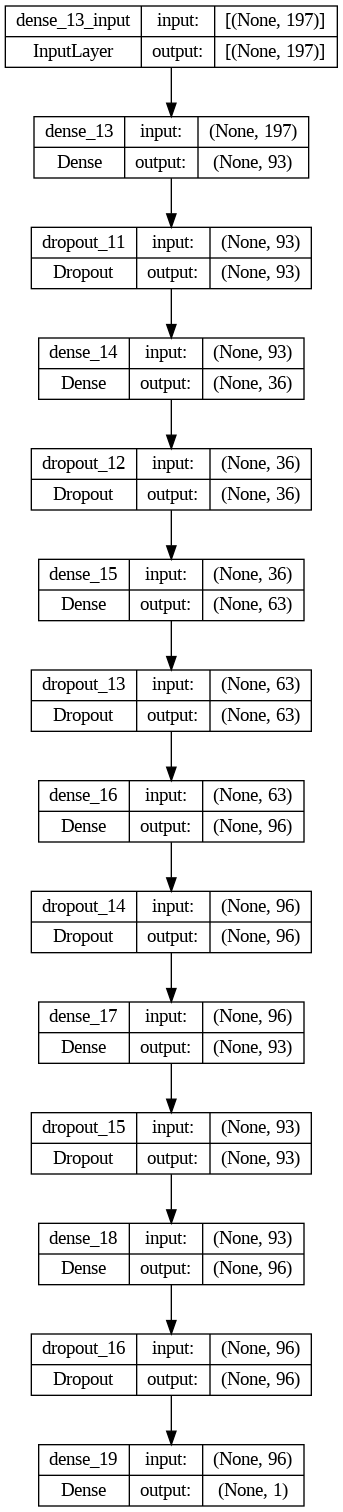

In [37]:
# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



In [38]:
# Make predictions for each Event_id and DriverNumber
df_grouped = q_.groupby(['Event_id', 'Driver'])
predictions = []  # Store predictions

for (event_id, driver_number), group_data in df_grouped:
    driver_X = group_data.drop('Race_AVG_Lap_Time_sec', axis=1)
    driver_X_preprocessed = preprocessor.transform(driver_X)
    prediction = model.predict(driver_X_preprocessed)

    predictions.append((event_id, driver_number, prediction[0][0]))  # Store results

# Create the DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Event_id', 'Driver', 'Predicted Avg Lap Time (sec)'])

# Handle potential nulls
if predictions_df.isnull().values.any():
    # Fill null values with a suitable default (e.g., 0)
    predictions_df = predictions_df.fillna(0)

#print(predictions_df)

1/1 [==============================] - 0s 22ms/step


In [39]:
predictions_df

,Event_id,Driver,Predicted Avg Lap Time (sec)
0,979,ALO,92.317322
1,979,BOT,92.159927
2,979,ERI,90.989670
3,979,GAS,91.700531
4,979,GRO,91.622879
...,...,...,...
2421,1226,SAR,91.091217
2422,1226,STR,91.682648
2423,1226,TSU,91.341927
2424,1226,VER,91.814445


In [40]:
winners_df=q_[['Race_Winner', 'Race_AVG_Lap_Time_sec','Event_id','Driver']]
winners_df.drop_duplicates(inplace=True)


<ipython-input-40-ba22d56b8612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_df.drop_duplicates(inplace=True)


In [41]:
winners_df

,Race_Winner,Race_AVG_Lap_Time_sec,Event_id,Driver
0,VET,92.637931,979,HUL
30,VET,92.637931,979,LEC
46,VET,92.637931,979,ERI
62,VET,92.637931,979,GRO
94,VET,92.637931,979,SAI
...,...,...,...,...
37242,VER,90.034483,1226,GAS
37259,VER,90.034483,1226,ALO
37277,VER,90.034483,1226,PIA
37294,VER,90.034483,1226,HAM


In [42]:
pred_df=pd.merge(predictions_df, winners_df, left_on=['Event_id','Driver'], right_on = ['Event_id','Driver'])
pred_df

,Event_id,Driver,Predicted Avg Lap Time (sec),Race_Winner,Race_AVG_Lap_Time_sec
0,979,ALO,92.317322,VET,92.637931
1,979,BOT,92.159927,VET,92.637931
2,979,ERI,90.989670,VET,92.637931
3,979,GAS,91.700531,VET,92.637931
4,979,GRO,91.622879,VET,92.637931
...,...,...,...,...,...
2421,1226,SAR,91.091217,VER,90.034483
2422,1226,STR,91.682648,VER,90.034483
2423,1226,TSU,91.341927,VER,90.034483
2424,1226,VER,91.814445,VER,90.034483


In [43]:
ev_1226=pred_df.loc[pred_df['Event_id'].isin([1226])]
ev_1226=ev_1226.sort_values(by='Predicted Avg Lap Time (sec)', ascending=True)
ev_1226

,Event_id,Driver,Predicted Avg Lap Time (sec),Race_Winner,Race_AVG_Lap_Time_sec
2421,1226,SAR,91.091217,VER,90.034483
2425,1226,ZHO,91.275818,VER,90.034483
2411,1226,HUL,91.286499,VER,90.034483
2423,1226,TSU,91.341927,VER,90.034483
2413,1226,MAG,91.381767,VER,90.034483
2417,1226,PIA,91.415909,VER,90.034483
2408,1226,BOT,91.472046,VER,90.034483
2414,1226,NOR,91.568123,VER,90.034483
2419,1226,RUS,91.580879,VER,90.034483
2409,1226,GAS,91.595711,VER,90.034483


In [55]:
ev_979=pred_df.loc[pred_df['Event_id'].isin([979])]
ev_979=ev_979.sort_values(by='Predicted Avg Lap Time (sec)', ascending=True)
ev_979

,Event_id,Driver,Predicted Avg Lap Time (sec),Race_Winner,Race_AVG_Lap_Time_sec
6,979,HAR,90.631149,VET,92.637931
2,979,ERI,90.989670,VET,92.637931
15,979,SIR,91.392822,VET,92.637931
7,979,HUL,91.529671,VET,92.637931
4,979,GRO,91.622879,VET,92.637931
3,979,GAS,91.700531,VET,92.637931
9,979,MAG,91.761978,VET,92.637931
17,979,VAN,91.801529,VET,92.637931
19,979,VET,92.021461,VET,92.637931
14,979,SAI,92.101997,VET,92.637931
